# Assignment 1

Seungwoo_Hong 10879420,
Jinhyun_Kim 11968850

# Import libraries & loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# Load dataset and display top 5 rows

df_bike=pd.read_csv("data.csv")
df_bike.head()

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


# EDA

In [3]:
# Discover missing values

df_bike.isna().sum()

Date                              0
Rented Bike Count                 0
Hour                              0
Temperature(Celsius)              0
Humidity(%)                       0
Wind speed (m/s)                  0
Visibility (10m)                  0
Dew point temperature(Celsius)    0
Solar Radiation (MJ/m2)           0
Rainfall(mm)                      0
Snowfall (cm)                     0
dtype: int64

No missing values are found from the dataset

In [4]:
# Discover data type

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            8760 non-null   object 
 1   Rented Bike Count               8760 non-null   int64  
 2   Hour                            8760 non-null   int64  
 3   Temperature(Celsius)            8760 non-null   float64
 4   Humidity(%)                     8760 non-null   int64  
 5   Wind speed (m/s)                8760 non-null   float64
 6   Visibility (10m)                8760 non-null   int64  
 7   Dew point temperature(Celsius)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)         8760 non-null   float64
 9   Rainfall(mm)                    8760 non-null   float64
 10  Snowfall (cm)                   8760 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


Dtype of Date should be modified to integers.

In [5]:
df_bike.describe()

,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The dataset has 6 features and 1 target variable with 8760 rows.

## Distribution

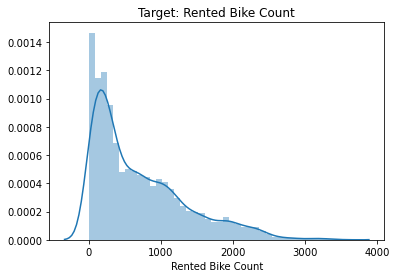

In [6]:
# Original target variable histogram

plt.title('Target: Rented Bike Count')
sns.distplot(df_bike['Rented Bike Count'])

The distribution of the target variable is skewed to the right.

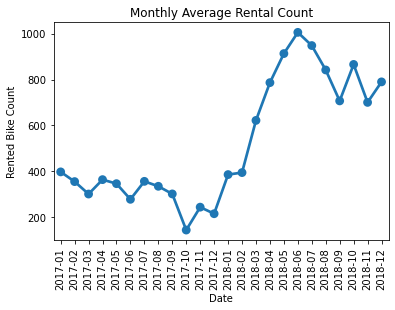

In [7]:
# Discover monthly average rental counts

df_date = df_bike[['Date', 'Rented Bike Count']].copy()
df_date.Date = pd.to_datetime(df_date.Date) 
df_date.set_index('Date', inplace=True)
df_date = df_date.resample('MS').mean().reset_index()

plt.title("Monthly Average Rental Count")
labels = df_date.Date.dt.to_period('M')
date_plot = sns.pointplot(data=df_date, x='Date', y='Rented Bike Count').set_xticklabels(rotation=90, labels=labels)

The rental count shows that there are significant increase in 2018 compared to 2017. The count has dropped in winter in both 2017 and 2018.

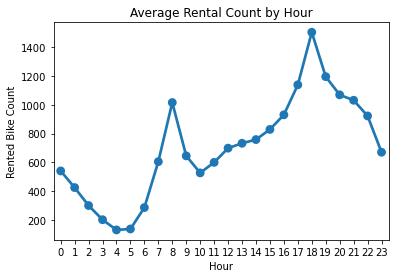

In [8]:
df_hour = df_bike.groupby('Hour').mean()['Rented Bike Count'].reset_index()

plt.title("Average Rental Count by Hour")
hourplot = sns.pointplot(data=df_hour, x='Hour', y='Rented Bike Count')

Average rental count by hour is relatively high in daytime. Also, there are high demand in rush hour--7 to 9 am in the morning and 18 in the afternoon.

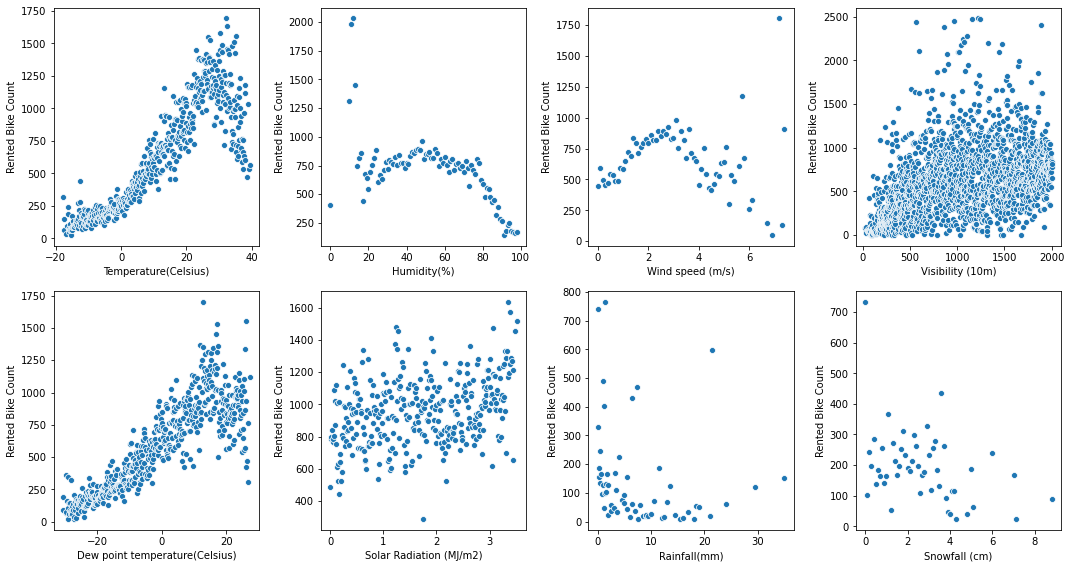

In [9]:
# Weather

df_temp = df_bike.groupby('Temperature(Celsius)').mean()['Rented Bike Count'].reset_index()
df_humid = df_bike.groupby('Humidity(%)').mean()['Rented Bike Count'].reset_index()
df_wind = df_bike.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].reset_index()
df_vis = df_bike.groupby('Visibility (10m)').mean()['Rented Bike Count'].reset_index()
df_dewp = df_bike.groupby('Dew point temperature(Celsius)').mean()['Rented Bike Count'].reset_index()
df_solar = df_bike.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].reset_index()
df_rain = df_bike.groupby('Rainfall(mm)').mean()['Rented Bike Count'].reset_index()
df_snow = df_bike.groupby('Snowfall (cm)').mean()['Rented Bike Count'].reset_index()

fig, ax = plt.subplots(2, 4, figsize=(15, 8))

sns.scatterplot(data=df_temp, ax=ax[0, 0], x='Temperature(Celsius)', y='Rented Bike Count')
sns.scatterplot(data=df_humid, ax=ax[0, 1], x='Humidity(%)', y='Rented Bike Count')
sns.scatterplot(data=df_wind, ax=ax[0, 2], x='Wind speed (m/s)', y='Rented Bike Count')
sns.scatterplot(data=df_vis, ax=ax[0, 3], x='Visibility (10m)', y='Rented Bike Count')
sns.scatterplot(data=df_dewp, ax=ax[1, 0], x='Dew point temperature(Celsius)', y='Rented Bike Count')
sns.scatterplot(data=df_solar, ax=ax[1, 1], x='Solar Radiation (MJ/m2)', y='Rented Bike Count')
sns.scatterplot(data=df_rain, ax=ax[1, 2], x='Rainfall(mm)', y='Rented Bike Count')
sns.scatterplot(data=df_snow, ax=ax[1, 3], x='Snowfall (cm)', y='Rented Bike Count')

plt.tight_layout()

&nbsp;&nbsp;&nbsp;&nbsp;From above eight graph, we can see that Temperature(Celsisus) and Dew point temperature(Celsisus) have strong 
positive correlation with rented bike count. From this result, it can be inferred that hot weather leads to more bike riding.

Additionally, Solar Radiation(MJ/m2) also have positive correlation with bike renting. However the positive correlation with bike renting is weak compared to temperature variables.

As to Humidity(%) and Wind speed(m/s), it can be seen that there are correlations with the 'Rented bike count'. Unlike the temperature, it is shown that positive correlations are changed to negative correlation. When Humidity(%) become higher than 50%, the Rented bike count starts to decrease. Similary, Wind speed(m/s) over 3(m/s) leads to less bike renting.

All of the rest variables shows almost zero correlation with bike renting. It is illustrated that Visibility(10m), Rainfall(mm), and Snowfall(cm) do not affect Rented bike count much. 

To sum up, Temperature(Celsisus) and Dew point temperature(Celsisus) have strong positive correlation. Solar Raridtion(MJ/m2) has weak positive correlation. Humidity(%) and Wind speed(m/s) show correlations that go up and down. Lastly, Visibility(10m), Rainfall(mm), and Snowfall(cm) have no effect on Bike Renting.

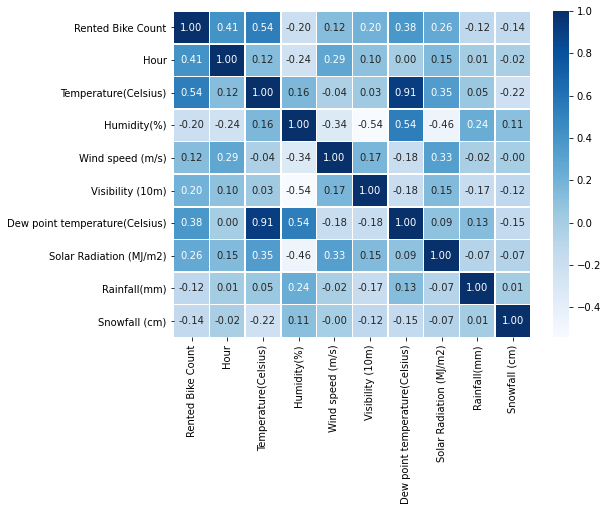

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_bike.corr(),annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Preprocessing

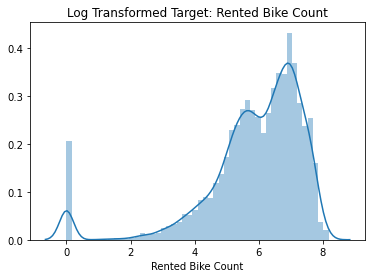

In [11]:
# Log transformed target variable histogram

log_rented_bike_count = np.log1p(df_bike['Rented Bike Count'])

plt.title('Log Transformed Target: Rented Bike Count')
sns.distplot(log_rented_bike_count)

In [12]:
# Test data transformation

def preprocess(df):
    # To right date format
    df2 = df.copy()
    df2.Date = df2.Date.apply(pd.to_datetime)
    df2['year'] = df2.Date.apply(lambda x: x.year)
    df2['month'] = df2.Date.apply(lambda x: x.month)
    df2['day'] = df2.Date.apply(lambda x: x.day)
    df2.drop(['Date'], axis=1, inplace=True)
    
    #original_target = df2['Rented Bike Count']
    #df2['Rented Bike Count'] = np.log1p(df2['Rented Bike Count'])
    
    # Transform dummy variable
    df2 = pd.get_dummies(df2, columns=['year', 'month', 'day', 'Hour'])
    
    return df2

First, date column must be transformed into right format. Second, we tried to normalize target variable since it was skewed. However, applying log to target variable did not changed the distribution to Gaussian distribution. Also, the model did not improved by scaling target with log, therefore we decided to not normalize the data. Finally, we created dummy variables of year, month, day and hour since, for example, december shown lower rental counts than that of may so that 12 should not be treated 'better' than 5.

In [13]:
# Preprocess 

df_bike_preprocessed = preprocess(df_bike)
df_bike_preprocessed

,Rented Bike Count,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year_2017,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


# Regression Models

In [14]:
# Run after preprocess

df_bike.Date = df_bike.Date.apply(pd.to_datetime)
df_bike['year'] = df_bike.Date.apply(lambda x: x.year)
df_bike['month'] = df_bike.Date.apply(lambda x: x.month)
df_bike['day'] = df_bike.Date.apply(lambda x: x.day)
df_bike.drop(['Date'], axis=1, inplace=True)

In [15]:
# Train test split

y = df_bike['Rented Bike Count']
X = df_bike.drop('Rented Bike Count', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

# Split preprocessed dataset

y_PP = df_bike_preprocessed['Rented Bike Count']
X_PP = df_bike_preprocessed.drop('Rented Bike Count', axis=1, inplace=False)

X_train_PP, X_test_PP, y_train_PP, y_test_PP = train_test_split(X_PP, y_PP, test_size=0.2, random_state=156)

In [16]:
# Define functions to calculate metrics

def evaluate(model, X_test, y_test, exp):
    # return np.expm1 for log normalized data
    if exp:
        pred = np.expm1(model.predict(X_test))
        y_true = np.expm1(y_test)

        MSE = mean_squared_error(y_true, pred)
        MAE = mean_absolute_error(y_true, pred)
        R_2 = r2_score(y_true, pred)

        print("Model - {} -".format(model), "MSE: {0:3f}, MAE: {1:3f}, R Squared: {2:3f}".format(MSE, MAE, R_2))
        
        return MSE, MAE, R_2
        
    else:
        pred = model.predict(X_test)
        y_true = y_test

        MSE = mean_squared_error(y_true, pred)
        MAE = mean_absolute_error(y_true, pred)
        R_2 = r2_score(y_true, pred)

        print("Model - {} -".format(model), "MSE: {0:3f}, MAE: {1:3f}, R Squared: {2:3f}".format(MSE, MAE, R_2))
        
        return MSE, MAE, R_2

In [17]:
# Model train - Basic Linear Regression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [18]:
LINEAR_REGRESSION = evaluate(model_lr, X_test=X_test, y_test=y_test, exp=False)

Model - LinearRegression() - MSE: 226922.749048, MAE: 352.588570, R Squared: 0.479424


In [19]:
# Display coefficients of features

def coef_chart(model, X=X):
    coef = pd.Series(model.coef_, X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

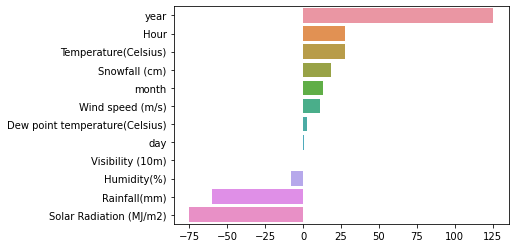

In [20]:
coef_chart(model_lr)

First, we tried fitting data without preprocessing (only right data type)

Above chart indicates that there are too much unnecessary weights to coefficient of 'year' feature.
Therefore, creating dummy variables is necessary.

In [21]:
# Linear regression model with preprocessed data
model_lr2 = LinearRegression()
model_lr2.fit(X_train_PP, y_train_PP)

LinearRegression()

In [22]:
LINEAR_REGRESSION_PREPROCESSED = evaluate(model_lr2, X_test=X_test_PP, y_test=y_test_PP, exp=False)

Model - LinearRegression() - MSE: 162104.468498, MAE: 303.623722, R Squared: 0.628122


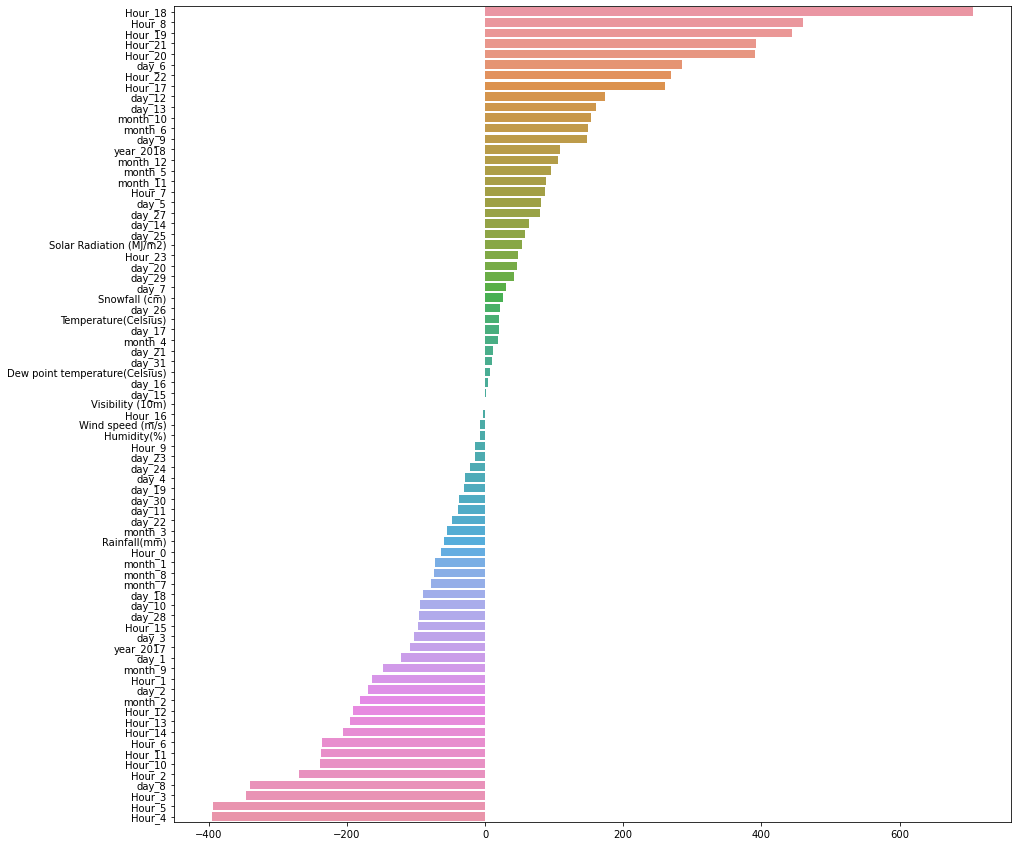

In [23]:
plt.figure(figsize=(15, 15))
coef_chart(model_lr2, X=X_PP)


Comparing metrics above, both MSE, MAE has decreased and r squared has improved with applying preprocessing.

In [24]:
# Model train - Ridge & Lasso

model_ridge = Ridge(random_state=156)
model_lasso = Lasso(random_state=156)

model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

Lasso(random_state=156)

In [25]:
RIDGE = evaluate(model_ridge, X_test=X_test, y_test=y_test, exp=False)
LASSO = evaluate(model_lasso, X_test=X_test, y_test=y_test, exp=False)

Model - Ridge(random_state=156) - MSE: 226920.526357, MAE: 352.584915, R Squared: 0.479430
Model - Lasso(random_state=156) - MSE: 226847.831969, MAE: 352.453917, R Squared: 0.479596


In [26]:
# Model train - Ridge & Lasso

model_ridge2 = Ridge(random_state=156)
model_lasso2 = Lasso(random_state=156)

model_ridge2.fit(X_train_PP, y_train_PP)
model_lasso2.fit(X_train_PP, y_train_PP)

Lasso(random_state=156)

In [27]:
RIDGE_PREPROCESSED = evaluate(model_ridge2, X_test=X_test_PP, y_test=y_test_PP, exp=False)
LASSO_PREPROCESSED = evaluate(model_lasso2, X_test=X_test_PP, y_test=y_test_PP, exp=False)

Model - Ridge(random_state=156) - MSE: 162061.885167, MAE: 303.510354, R Squared: 0.628219
Model - Lasso(random_state=156) - MSE: 162564.961747, MAE: 301.361663, R Squared: 0.627065


Above ridge and lasso models are fitted without hyper parameter tuning. In both models, preprocessed models were shown better.

# Hyper Parameter Tuning

We know that traning with preprocessed data is better from above experiments. So from below, we will find best alphas with prepocessed dataset.

In [28]:
def find_best_alpha(MODEL, PARAMS, CV=10):
    # GridSearchCV to find best alpha
    grid = GridSearchCV(MODEL, PARAMS, cv=CV, return_train_score=True, scoring='neg_mean_squared_error')
    grid.fit(X_PP, y_PP)
    mse = -1 * grid.best_score_
    best_alpha = grid.best_params_
    
    alphas = PARAMS['alpha']
    
    train_scores_mean = grid.cv_results_["mean_train_score"]
    train_scores_std = grid.cv_results_["std_train_score"]
    test_scores_mean = grid.cv_results_["mean_test_score"]
    test_scores_std = grid.cv_results_["std_test_score"]
    
    plt.figure()
    plt.title('Model')
    plt.xlabel('$\\alpha$ (alpha)')
    plt.ylabel('Score')

    # plot train scores
    plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
                 color='navy')

    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(alphas,
                           train_scores_mean - train_scores_std,
                           train_scores_mean + train_scores_std,
                           alpha=0.2,
                           color='navy')
    plt.semilogx(alphas, test_scores_mean,
                 label='Mean Test score', color='darkorange')

    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(alphas,
                           test_scores_mean - test_scores_std,
                           test_scores_mean + test_scores_std,
                           alpha=0.2,
                           color='darkorange')

    plt.legend(loc='best')
    plt.show()
    
    print("Best MSE: {:.2f}".format(grid.best_score_))
    print("Best Alpha: ", grid.best_params_)

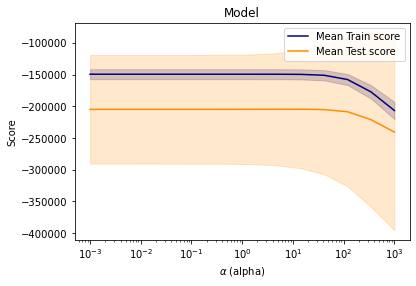

Best MSE: -204687.16
Best Alpha:  {'alpha': 4.923882631706742}


In [29]:
ridge_params = {'alpha':np.logspace(-3, 3, 14)}
find_best_alpha(Ridge(random_state=156), ridge_params)

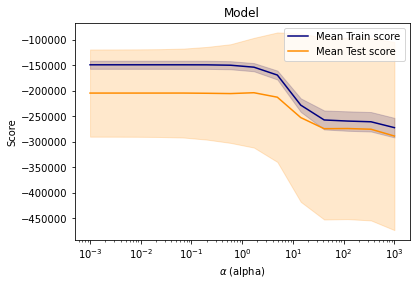

Best MSE: -204214.42
Best Alpha:  {'alpha': 1.7012542798525891}


In [30]:
lasso_params = {'alpha': np.logspace(-3, 3, 14)}
find_best_alpha(Lasso(random_state=156), lasso_params)

# Final Model with Best Alpha

In [31]:
# fitting ridge with best alpha=4.9

model_ridge3 = Ridge(alpha=4.9, random_state=156)
model_ridge3.fit(X_PP, y_PP)
RIDGE_BEST = evaluate(model_ridge3, X_test=X_test_PP, y_test=y_test_PP, exp=False)

Model - Ridge(alpha=4.9, random_state=156) - MSE: 157731.060520, MAE: 299.423076, R Squared: 0.638155


Model Ridge fitted with best alpha calculated above (=4.9), has improved compared to model with alpha 1.0.

In [32]:
# fitting lasso with best alpha=1.7

model_lasso3 = Lasso(alpha=1.7, random_state=156)
model_lasso3.fit(X_PP, y_PP)
LASSO_BEST = evaluate(model_lasso3, X_test=X_test_PP, y_test=y_test_PP, exp=False)

Model - Lasso(alpha=1.7, random_state=156) - MSE: 161810.493186, MAE: 299.763823, R Squared: 0.628796


Model Lasso fitted with best alpha calculated above (=1.7), has improved compared to model with alpha 1.0.

# Conclusion

In [33]:
# Model comparison 

df_conclusion = pd.DataFrame(columns=['MSE', 'MAE', 'R_Squared'])
df_conclusion = df_conclusion.append(pd.Series(list(LINEAR_REGRESSION), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(LINEAR_REGRESSION_PREPROCESSED), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(RIDGE), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(RIDGE_PREPROCESSED), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(RIDGE_BEST), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(LASSO), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(LASSO_PREPROCESSED), index=df_conclusion.columns), ignore_index=True)
df_conclusion = df_conclusion.append(pd.Series(list(LASSO_BEST), index=df_conclusion.columns), ignore_index=True)
df_conclusion['Model'] = ['Basic Linear Regression', 'Preprocessed Linear Regression', 'Basic Ridge', 'Preprocessed Ridge', 'Best Alpha Ridge', 'Basic Lasso', 'Preprocessed Lasso', 'Best Alpha Lasso']
df_conclusion = df_conclusion[['Model', 'MSE', 'MAE', 'R_Squared']]
df_conclusion.set_index('Model', inplace=True)
display(df_conclusion)

,MSE,MAE,R_Squared
Model,,,
Basic Linear Regression,226922.749048,352.588570,0.479424
Preprocessed Linear Regression,162104.468498,303.623722,0.628122
Basic Ridge,226920.526357,352.584915,0.479430
Preprocessed Ridge,162061.885167,303.510354,0.628219
Best Alpha Ridge,157731.060520,299.423076,0.638155
Basic Lasso,226847.831969,352.453917,0.479596
Preprocessed Lasso,162564.961747,301.361663,0.627065
Best Alpha Lasso,161810.493186,299.763823,0.628796


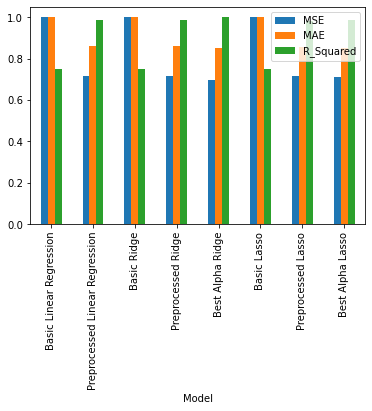

In [34]:
# THIS PLOT IS NORMALIZED
df_conclusion.apply(lambda x: x/x.max(), axis=0).plot(kind='bar')

First, we tried to navigate the nature of the bike rental dataset. </br>  During our EDA, we found that there were some seasonality from the time series of both month and hours. The average rental had significantly increased in 2018 compared to the prior year. The increase might be due to the promotion of the bike rental service, therefore the yearly increase rate isn't guaranteed for the following few years. This means that we need more data to find the right coefficient for the feature year to be more accurate.  </br>

Preprocessing has mainly done for changing data to right foramts, for example, we separated Date column into day, month and year. Then, we transformed date and hour to dummy variables to avoid too much unnecessary weights on coefficients. </br>

We first tried to generate baseline models with linear regression, ridge regression, lasso reggression without dummy variables. Next, applying preprocessing functions, the model has improved from every metrics (MSE, MAE, Rsquared). Since we knew that preprocessed model works better after the first experiment, hyper parameter tuning using gridsearch cv has been done based on second models. We optimal value of alpha we got for ridge and lasso models were 4.9 and 1.7 respectively. With optimal alphas, ridge and lasso models even performed better with MSE of 157731.060520 and 161810.493186 respectively.